#Assignment 1

**Hugging face agents**

It's an abstraction layer, that helps us to interact with models easily, such tools as pipeline.


In [ ]:
from transformers import pipeline


**Hugging face pipeline for text generation**

In [22]:
from transformers import pipeline

pipe = pipeline("text-generation", model="databricks/dolly-v2-3b", torch_dtype=torch.bfloat16, trust_remote_code=True, device_map="auto")
res = pipe("The Sky is ")
res[0]["generated_text"]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


KeyboardInterrupt: 

**HF inference endpoints**

In [24]:
import requests

API_URL = "https://api-inference.huggingface.co/models/facebook/bart-large-cnn"

def query(payload):
    response = requests.post(API_URL, json=payload)
    return response.json()

params = {'do_sample': False}

full_text = '''ويكيبيديا مشروع تعاوني متعدد اللغات يضم ويكيات بأكثر من 300 لغة للعمل في مشاريع موسوعات حرة ودقيقة ومتكاملة ومتنوعة ومحايدة، يستطيع الجميع المساهمة في تحريرها. نشأت ويكيبيديا في عام 2001، حيث نمت وتطورت بسرعة لتصبح واحدة من أكبر المواقع على الإنترنت. بدأت النسخة العربية في يوليو/تموز 2003.'''

output = query({
    'inputs': full_text,
    'parameters': params
})

output

{'error': 'Rate limit reached. Please log in or use a HF access token'}

**Feedback**

In [ ]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipeline("A Cat in a forest")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [26]:
!pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.6 MB/s eta 0:00:00


#Assignment 2

**Part 1**

In [2]:
from transformers import pipeline
from os import listdir

images = listdir("/content/to_caption")
for i in range(len(images)):
  images[i] = "/content/to_caption/"+images[i]

ds = listdir("/content/dataset")
for i in range(len(ds)):
  ds[i] = "/content/dataset/"+ds[i]
ds

['/content/dataset/cat_464.jpg',
 '/content/dataset/dog_114.jpg',
 '/content/dataset/cat_355.jpg',
 '/content/dataset/cat_583.jpg',
 '/content/dataset/cat_332.jpg',
 '/content/dataset/cat_313.jpg',
 '/content/dataset/dog_551.jpg',
 '/content/dataset/cat_158.jpg',
 '/content/dataset/cat_1.jpg',
 '/content/dataset/cat_395.jpg',
 '/content/dataset/cat_306.jpg',
 '/content/dataset/dog_237.jpg',
 '/content/dataset/dog_196.jpg',
 '/content/dataset/cat_279.jpg',
 '/content/dataset/dog_124.jpg',
 '/content/dataset/dog_303.jpg',
 '/content/dataset/dog_354.jpg',
 '/content/dataset/dog_398.jpg',
 '/content/dataset/dog_415.jpg',
 '/content/dataset/dog_327.jpg',
 '/content/dataset/cat_140.jpg',
 '/content/dataset/cat_375.jpg',
 '/content/dataset/dog_142.jpg',
 '/content/dataset/dog_89.jpg',
 '/content/dataset/cat_119.jpg',
 '/content/dataset/cat_575.jpg',
 '/content/dataset/cat_585.jpg',
 '/content/dataset/dog_258.jpg',
 '/content/dataset/dog_191.jpg',
 '/content/dataset/dog_227.jpg',
 '/content/da

In [3]:
captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
captions = captioner(images)
caps = []
for i in range(len(captions)):
  caps.append(captions[i][0]["generated_text"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [4]:
caps

['a fluffy cat sitting on a rock in the woods',
 'a dog is sitting in the grass with a leash',
 'a person holding a dog on their lap',
 'two dogs are facing each other dogs',
 'a woman holding a white cat in her arms',
 'a cat and a cat looking at each other cat',
 "a small kitten is laying on a person's hand",
 'a cat sitting on a coffee table in a living room',
 "a cat with a leash on it's neck",
 'a cat laying on top of a bed',
 'two dogs sitting in the grass',
 'a dog is looking up at the camera',
 'a cat is laying in a knitted chair',
 'a cat with blue eyes sitting on a wooden bench',
 'a dog being fed by its owner']

a fluffy cat sitting on a rock in the woods


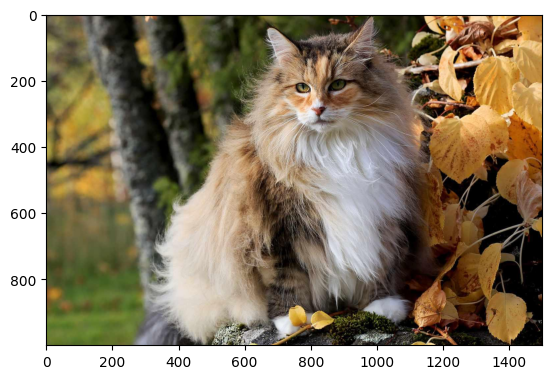

a dog is sitting in the grass with a leash


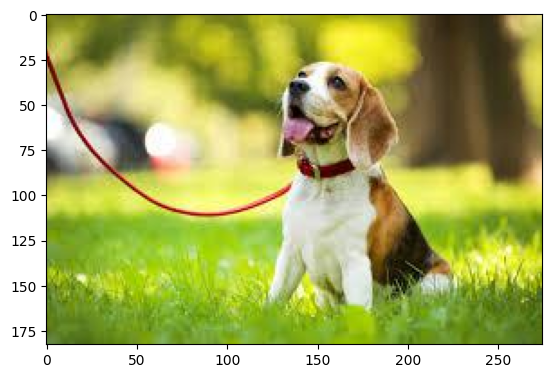

a person holding a dog on their lap


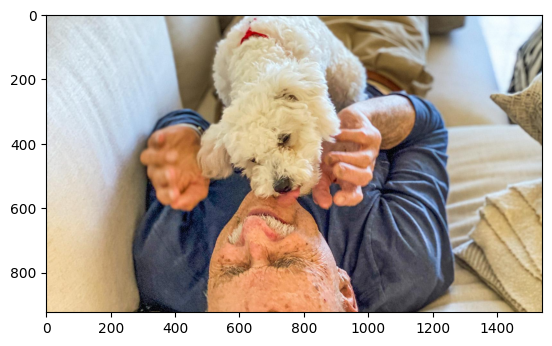

two dogs are facing each other dogs


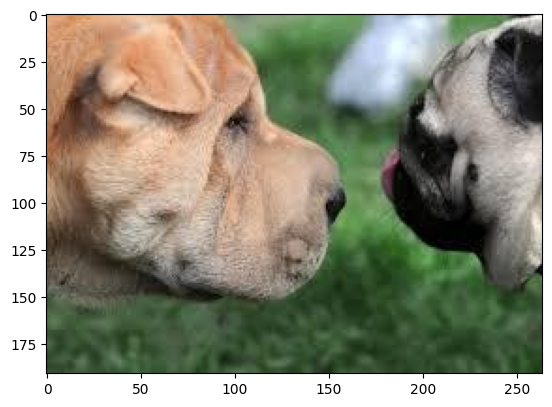

a woman holding a white cat in her arms


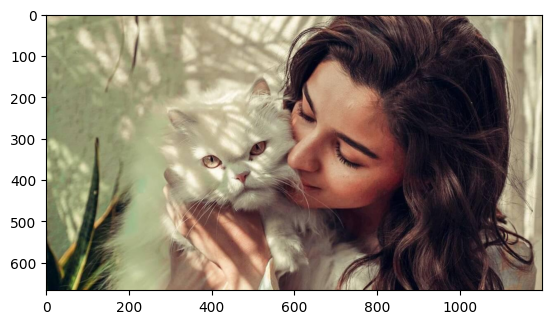

a cat and a cat looking at each other cat


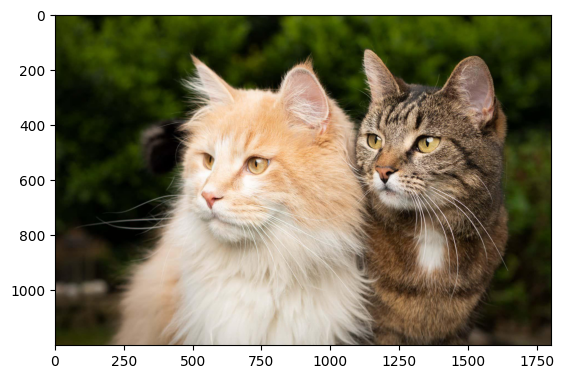

a small kitten is laying on a person's hand


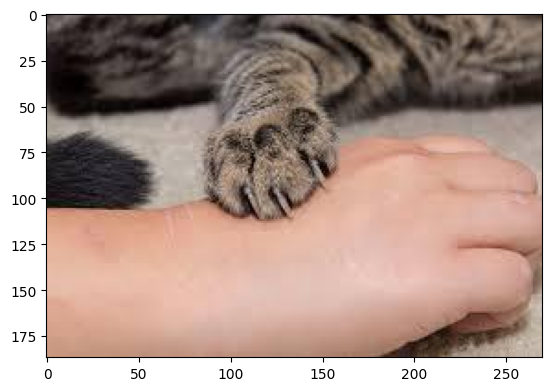

a cat sitting on a coffee table in a living room


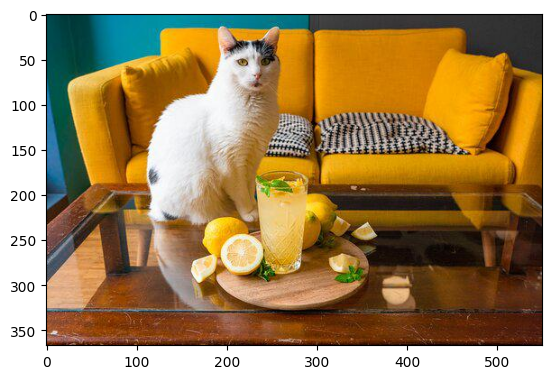

a cat with a leash on it's neck


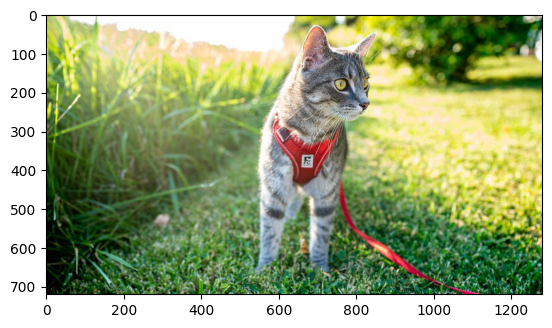

a cat laying on top of a bed


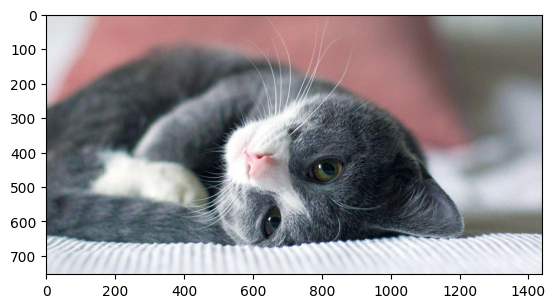

two dogs sitting in the grass


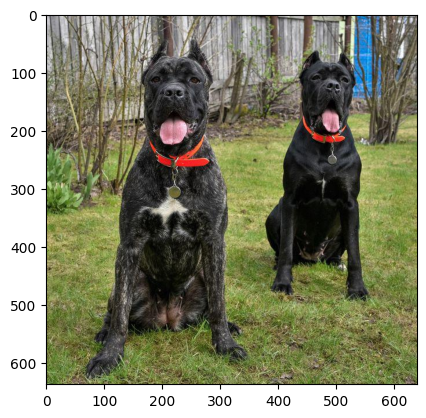

a dog is looking up at the camera


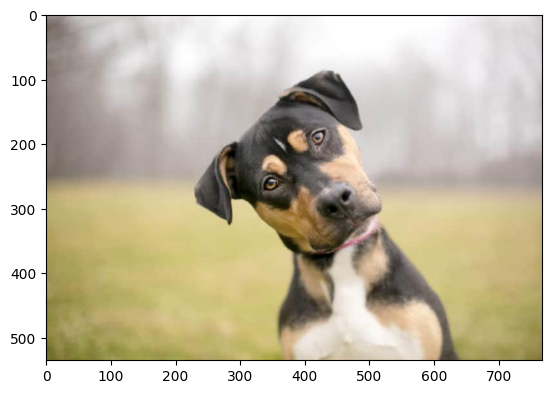

a cat is laying in a knitted chair


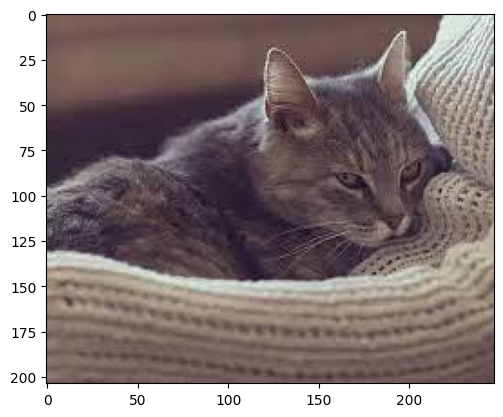

a cat with blue eyes sitting on a wooden bench


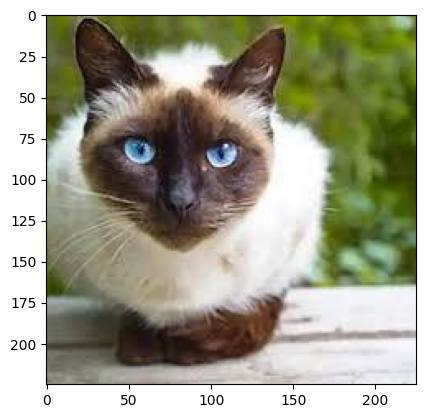

a dog being fed by its owner


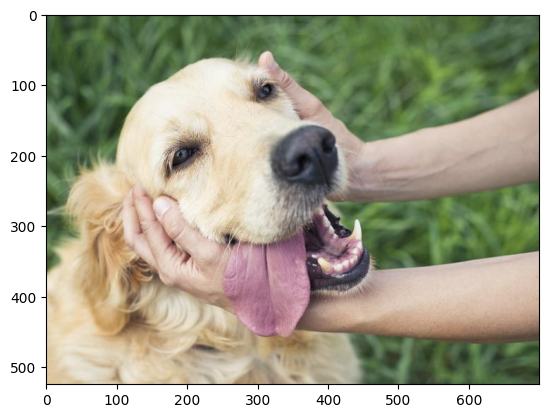

In [5]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
dataset = []
for img in ds:
  dataset.append(Image.open(img))
imgs = []
for image in images:
  imgs.append(Image.open(image))
for i in range(len(imgs)):
  print(caps[i])
  plt.show(plt.imshow(np.asarray(imgs[i])))

In [6]:
!pip install sentence_transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [7]:
from transformers import CLIPProcessor, CLIPModel
import torch
from sentence_transformers.util import cos_sim

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')
cap = "a dog being fed by its owner"
inputs = processor(images=dataset, return_tensors="pt", padding=True)
with torch.no_grad():
  img_features = model.get_image_features(**inputs)


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Please enter image description:a furless cat


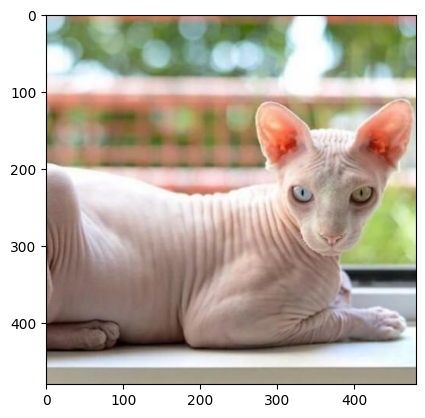

In [12]:
caption = input("Please enter image description:")
with torch.no_grad():
  text_features = model.get_text_features(**processor(text=caption, return_tensors="pt", padding=True))

score = cos_sim(img_features, text_features)
img_idx = score.argmax().item()
plt.show(plt.imshow(np.asarray(dataset[img_idx])))